In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

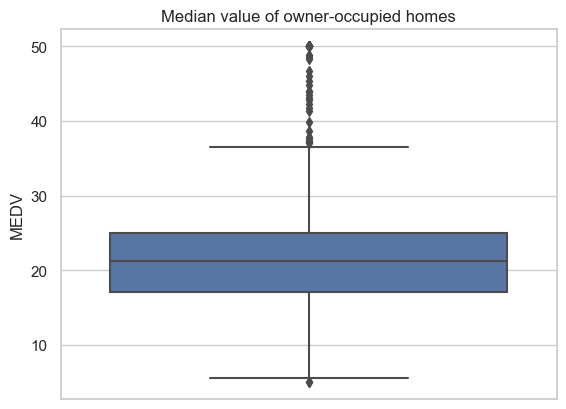

In [3]:
# For the "Median value of owner-occupied homes" provide a boxplot
sns.set(style='whitegrid')
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')
plt.show()

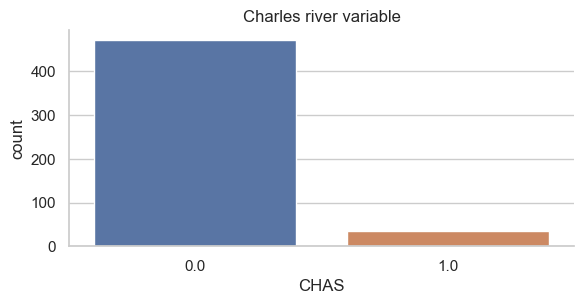

In [4]:
sns.catplot(x='CHAS', data=boston_df, kind='count', height=3, aspect=2)
plt.title('Charles river variable')
plt.show()

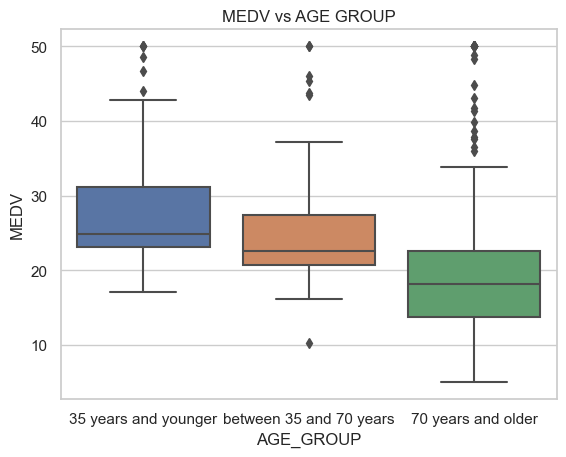

In [5]:
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_GROUP'] = '70 years and older'


sns.boxplot(y='MEDV', x='AGE_GROUP', data=boston_df, order=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.title('MEDV vs AGE GROUP')
plt.show()

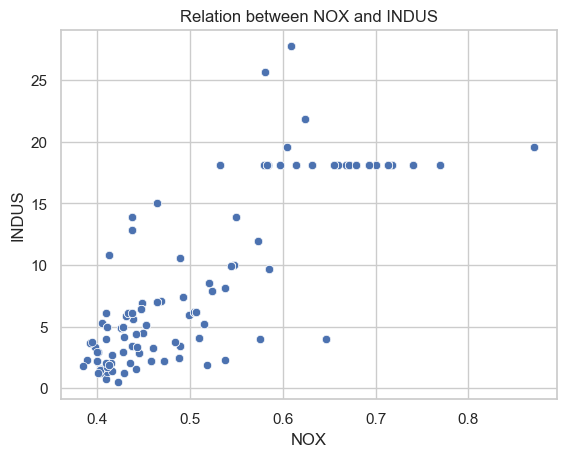

In [6]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relation between NOX and INDUS')
plt.show()

# NOX and INDUS have an increasing trend.

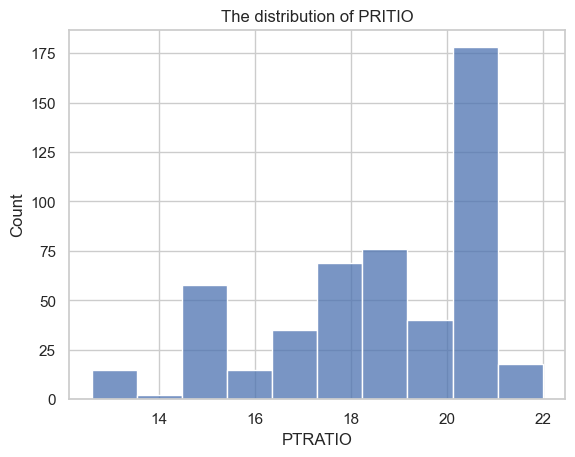

In [7]:
sns.histplot(boston_df['PTRATIO'], bins=10)
plt.title('The distribution of PRITIO')
plt.show()

### **1. Is there significant difference in median value of houses bounded by the Charles river or not?**

#### Null hypothesis: there is no significant difference in median value of houses bounded by the Charles river.
#### Alternative hypothesis: there is significant difference in median value of houses bounded by the Charles river.

In [8]:
# Check diference variance between 2 group
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [9]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'], equal_var=False)

# 0.05 > pvalue
# we reject Null hypothesis, which there is no significant difference in median value of houses bounded by the Charles river

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

### **2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**
#### Null hypothesis: there is no a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#### Aternative hypothesis: there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [10]:
# Check diference variance between 3 group

group_1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
group_2 = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
group_3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

scipy.stats.levene(group_1, group_2, group_3, center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [11]:
scipy.stats.f_oneway(group_1, group_2, group_3)

# we reject Null hypothesis, which there is no a difference in Median values of houses (MEDV) 
# for each proportion of owner occupied units built prior to 1940 (AGE)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

### **3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

#### Null hypothesis: no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#### Alternative hypothesis: relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [12]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# we reject Null hypothesis, which there is no relationship between Nitric oxide concentrations 
# and proportion of non-retail business acres per town and accept Alternative hypothesis

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

### **4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?**
#### Null hypothesis: an additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes
#### Alternative hypothesis: an additional weighted distance to the five Boston employment centres has inmpact on the median value of owner occupied homes

In [13]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

# P-value: 1.21e-08 < 0.05, correlation = 0.2489
# we reject the Null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        10:11:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""